In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'C:\\Users\\ASUS\\Desktop\\poro_perm_data.csv'
df = pd.read_csv(path)


In [78]:
# converting to meter
df['Depth (ft)']=df['Depth (ft)']*0.3048

In [79]:
print(df['Porosity (%)'])

# converting porosity to decimal
df['Porosity (%)'] = (df['Depth (ft)']*df['Porosity (%)'])/100
print(df['Porosity (%)'])

0      14.427556
1      16.733522
2      20.211138
3       0.399182
4      14.533879
         ...    
118    11.685027
119    17.913516
120    24.684013
121    24.684013
122     9.835170
Name: Porosity (%), Length: 123, dtype: float64
0       81.947769
1      128.274497
2       99.058507
3        0.244558
4      114.292096
          ...    
118     91.319331
119     17.062624
120    107.814438
121    190.198812
122     77.522067
Name: Porosity (%), Length: 123, dtype: float64


In [80]:
# finding mean 

mean_perm = df['Permeability (mD)'].mean()
mean_depth = df['Depth (ft)'].mean()
mean_poro = df['Porosity (%)'].mean()
print(f'Mean of Depth in meter: {mean_depth}')
print(f'Mean of Permeability in mD: {mean_perm}')
print(f'Mean of Porosity in decimal: {mean_poro}')

Mean of Depth in meter: 571.3252975609756
Mean of Permeability in mD: 39.05133067300819
Mean of Porosity in decimal: 79.39684005795243


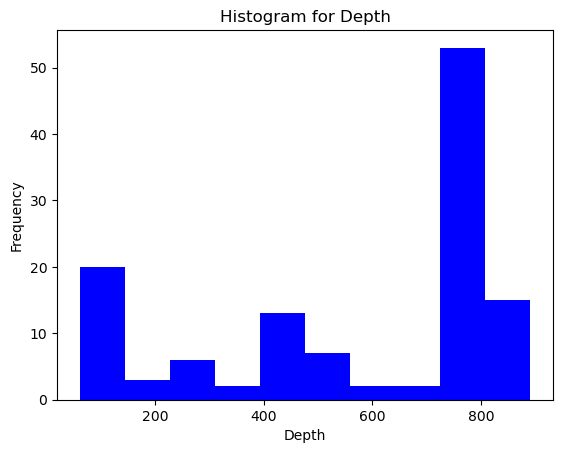

In [81]:
# HISTORAMS

plt.hist(df['Depth (ft)'], color = 'blue')
plt.ylabel('Frequency')
plt.xlabel('Depth')
plt.title('Histogram for Depth')
plt.show()

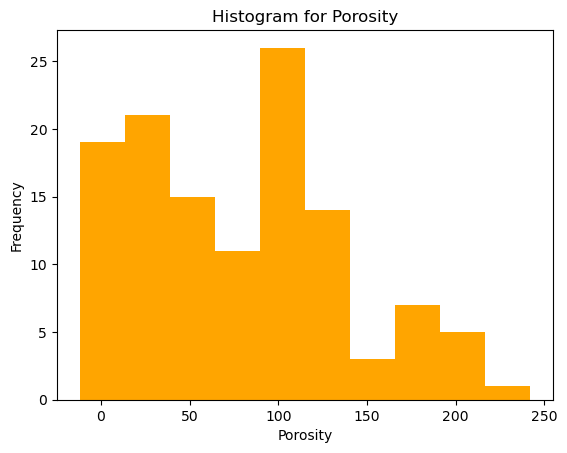

In [82]:
plt.hist(df['Porosity (%)'], color = 'orange')
plt.ylabel('Frequency')
plt.xlabel('Porosity')
plt.title('Histogram for Porosity')
plt.show()

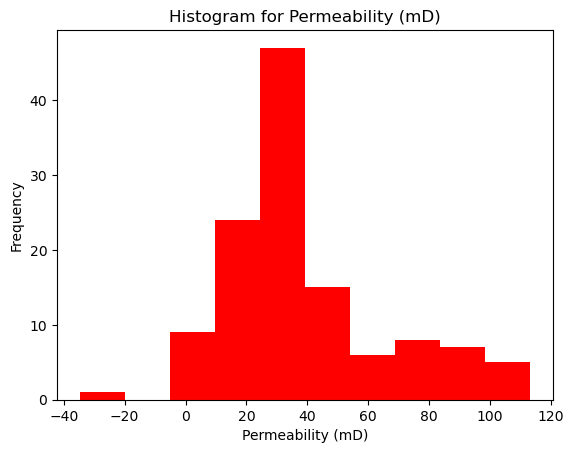

In [83]:
plt.hist(df['Permeability (mD)'], color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Permeability (mD)')
plt.title('Histogram for Permeability (mD)')
plt.show()

In [84]:
from scipy.stats import anderson

result = anderson(df['Depth (ft)'])
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues)) 


Statistic: 8.919
15.000: 0.559, data does not look normal (reject H0)
10.000: 0.636, data does not look normal (reject H0)
5.000: 0.763, data does not look normal (reject H0)
2.500: 0.891, data does not look normal (reject H0)
1.000: 1.059, data does not look normal (reject H0)


In [85]:
result = anderson(df['Porosity (%)'])
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: nan
15.000: 0.559, data does not look normal (reject H0)
10.000: 0.636, data does not look normal (reject H0)
5.000: 0.763, data does not look normal (reject H0)
2.500: 0.891, data does not look normal (reject H0)
1.000: 1.059, data does not look normal (reject H0)
